In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
import os

In [20]:
coords = pd.read_excel("C:\\Users\\stadn\\Desktop\\_robot_dane_operator\\results.xlsx")

In [5]:
dirname = "C:\\Users\\stadn\\Desktop\\_robot_dane_operator\\operatorzy"

In [12]:
images = []
for img in os.listdir(dirname):
    img1 = dirname+"\\"+img
    image = cv2.imread(img1)
    
    cropped_img = image[765:3598, 1008:2770]
    scale_percent = 30
    width = int(cropped_img.shape[1] * scale_percent / 100)
    height = int(cropped_img.shape[0] * scale_percent / 100)
    size = (width, height)
    
    resized = cv2.resize(cropped_img, size)
    
    images.append(resized)

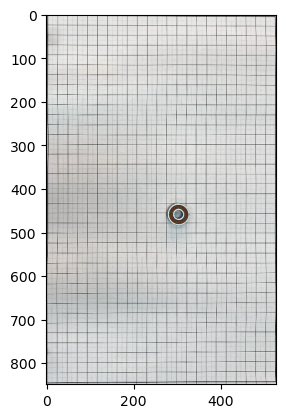

In [13]:
plt.imshow(images[0])

In [21]:
coords = coords.drop("Nr obserwacji", axis=1)

In [24]:
coords["X"] = coords["X"] / 370

In [26]:
coords["Y"] = coords["Y"] / 230

In [28]:
coords["X"] = coords["X"] - np.mean(coords["X"])

In [30]:
coords["Y"] = coords["Y"] - np.mean(coords["Y"])

In [39]:
coords = np.array(coords)

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
images = np.array(images)

In [47]:
images = images / 255

In [49]:
X_train, X_test, y_train, y_test = train_test_split(images, coords, test_size=0.25, random_state=42)

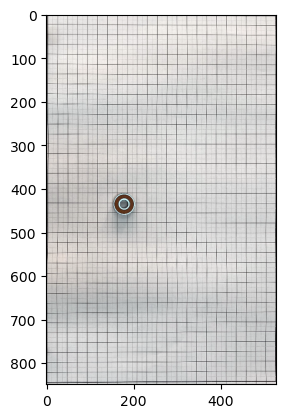

In [50]:
plt.imshow(X_train[0])

In [58]:
model = Sequential(
    [
        Input(shape=(849, 528, 3)),
        Conv2D(32, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(8, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(4, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        #Conv2D(4, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
        Flatten(),
        Dense(2, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 423, 263, 32)      1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 211, 131, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 104, 64, 16)       8208      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 52, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 15, 8)         2056      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 7, 8)        

In [62]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics="mse")

In [63]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
4/4 - 9s - loss: 0.0020 - mse: 0.2592 - val_loss: -6.4610e-03 - val_mse: 0.2654 - 9s/epoch - 2s/step
Epoch 2/50
4/4 - 6s - loss: 0.0019 - mse: 0.2594 - val_loss: -6.6396e-03 - val_mse: 0.2656 - 6s/epoch - 2s/step
Epoch 3/50
4/4 - 6s - loss: 0.0021 - mse: 0.2599 - val_loss: -6.9168e-03 - val_mse: 0.2661 - 6s/epoch - 2s/step
Epoch 4/50
4/4 - 7s - loss: 0.0022 - mse: 0.2605 - val_loss: -7.1392e-03 - val_mse: 0.2668 - 7s/epoch - 2s/step
Epoch 5/50
4/4 - 7s - loss: 0.0022 - mse: 0.2615 - val_loss: -7.4361e-03 - val_mse: 0.2680 - 7s/epoch - 2s/step
Epoch 6/50
4/4 - 7s - loss: 0.0022 - mse: 0.2630 - val_loss: -8.0303e-03 - val_mse: 0.2700 - 7s/epoch - 2s/step
Epoch 7/50
4/4 - 6s - loss: 0.0025 - mse: 0.2658 - val_loss: -8.7188e-03 - val_mse: 0.2730 - 6s/epoch - 2s/step
Epoch 8/50
4/4 - 6s - loss: 0.0027 - mse: 0.2696 - val_loss: -9.4496e-03 - val_mse: 0.2777 - 6s/epoch - 2s/step
Epoch 9/50
4/4 - 7s - loss: 0.0029 - mse: 0.2754 - val_loss: -1.0375e-02 - val_mse: 0.2850 - 7s/epoch - 

KeyboardInterrupt: 

In [100]:
trained_coords = model(images)

In [101]:
trained_coords = pd.DataFrame(trained_coords)

In [102]:
trained_coords[0] = trained_coords[0] + np.mean(coords[:,0])

In [103]:
trained_coords[0] = trained_coords[0] * 370

In [104]:
trained_coords[1] = trained_coords[1] + np.mean(coords[:,1])
trained_coords[1] = trained_coords[1] * 230

In [105]:
trained_coords

,0,1
0,12.556829,222.194412
1,15.008475,220.670410
2,13.662032,221.507385
3,14.422711,221.034515
4,14.161364,221.196976
...,...,...
145,13.839731,221.396912
146,14.543058,220.959717
147,14.364768,221.070526
148,13.431752,221.650528
